In [43]:
# load the data and packages needed
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load the dataset
spam_data = pd.read_csv('spam.csv')

In [44]:
# Splitting Dataset into two parts train and testing
# Training Set = 1000
# Test Set = 3601

from sklearn.model_selection import train_test_split
spam_test_set, spam_training_set = train_test_split(spam_data, test_size=0.8,random_state=42)

In [45]:
# Creating Training and Test Targets
spam_training_data, spam_training_target = spam_training_set[["make","address","all","3d","our","over","remove","internet","order","mail","receive","will","people","report","addresses","free","business","email","you","credit","your","font","0","money","hp","hpl","george","650","lab","labs","telnet","857","data","415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference","semicol","paren","bracket","bang","dollar","pound","cap_avg","cap_long","cap_total"]], spam_training_set["Class"]
spam_test_data, spam_test_target = spam_test_set[["make","address","all","3d","our","over","remove","internet","order","mail","receive","will","people","report","addresses","free","business","email","you","credit","your","font","0","money","hp","hpl","george","650","lab","labs","telnet","857","data","415","85","technology","1999","parts","pm","direct","cs","meeting","original","project","re","edu","table","conference","semicol","paren","bracket","bang","dollar","pound","cap_avg","cap_long","cap_total"]], spam_test_set["Class"]

In [46]:
# Create Classifier Objects

clf_dt = DecisionTreeClassifier(criterion="entropy")
#clf_ad = AdaBoostClassifier(n_estimators = 1000, base_estimator = clf_dt)
#clf_rf = RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt')
clf_lr = LogisticRegression(max_iter=4000)
clf_gnb = GaussianNB()
fused_model = VotingClassifier(estimators = [('DT', clf_dt),('LR',clf_lr),('GNB',clf_gnb)], voting ='hard')

fused_model.fit(spam_training_data,spam_training_target)
spam_test_target_predict = fused_model.predict(spam_test_data)

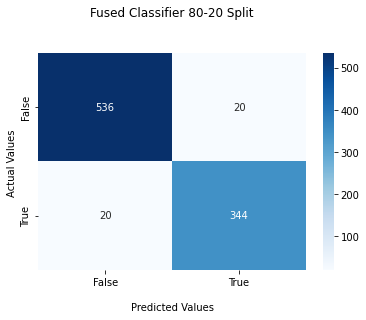

In [47]:
# This is code to print the confusion matrix in a better way 
# I used the sklearn site https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(spam_test_target,spam_test_target_predict)
image = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')
image.set_title('Fused Classifier 80-20 Split\n\n');
image.set_xlabel('\nPredicted Values')
image.set_ylabel('Actual Values ');
image.xaxis.set_ticklabels(['False','True'])
image.yaxis.set_ticklabels(['False','True'])

plt.show()

In [48]:
print(confusion_matrix(spam_test_target,spam_test_target_predict))
print(classification_report(spam_test_target,spam_test_target_predict))
print(accuracy_score(spam_test_target,spam_test_target_predict))

[[536  20]
 [ 20 344]]
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       556
        spam       0.95      0.95      0.95       364

    accuracy                           0.96       920
   macro avg       0.95      0.95      0.95       920
weighted avg       0.96      0.96      0.96       920

0.9565217391304348
